In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data from JSON file
df = pd.read_json(r'C:\Users\ravik\Downloads\data-20240615T070755Z-001\data\loan_approval_dataset.json',encoding='utf-8')

In [3]:
# Display the first few rows of the dataset
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# Display the shape of the dataset (number of rows and columns)
df.shape

(252000, 13)

In [5]:
# Display the counts of unique values in the 'Married/Single' column
df['Married/Single'].value_counts()

Married/Single
single     226272
married     25728
Name: count, dtype: int64

In [6]:
# Display the counts of unique values in the 'House_Ownership' column
df['House_Ownership'].value_counts()

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

In [7]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [8]:
# Optimizing data types to reduce memory usage
print(f"Memory usage before optimization: {df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB")

# Convert integer columns to more memory-efficient types
int_columns = df.select_dtypes(include=['int64']).columns
for col in int_columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

# Convert object columns to category type
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col] = df[col].astype('category')

Memory usage before optimization: 108.56 MB


In [9]:
#check for null values
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

#### There is no null values in the Data

In [10]:
#At this point iam not finding id column very useful so dropping it
df = df.drop(['Id'],axis=1)


In [11]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


<Axes: xlabel='Risk_Flag', ylabel='count'>

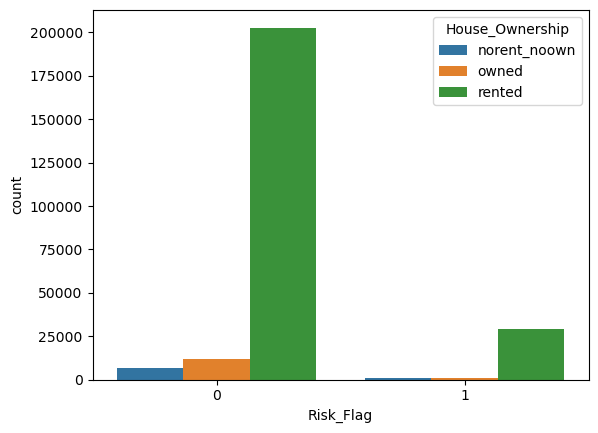

In [12]:
# Visualizing the distribution of 'Risk_Flag' by 'House_Ownership' using seaborn
sns.countplot(x='Risk_Flag',data=df,hue='House_Ownership')

#### by looking this graph rented people take more loan and maximum people are flagged into low risk

<Axes: xlabel='Risk_Flag', ylabel='count'>

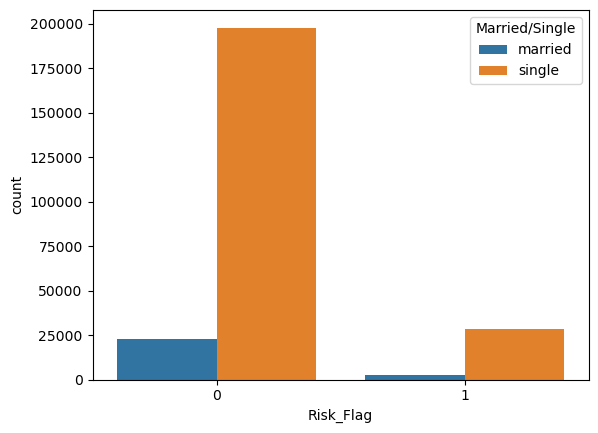

In [13]:
sns.countplot(x='Risk_Flag' ,data = df , hue = 'Married/Single')

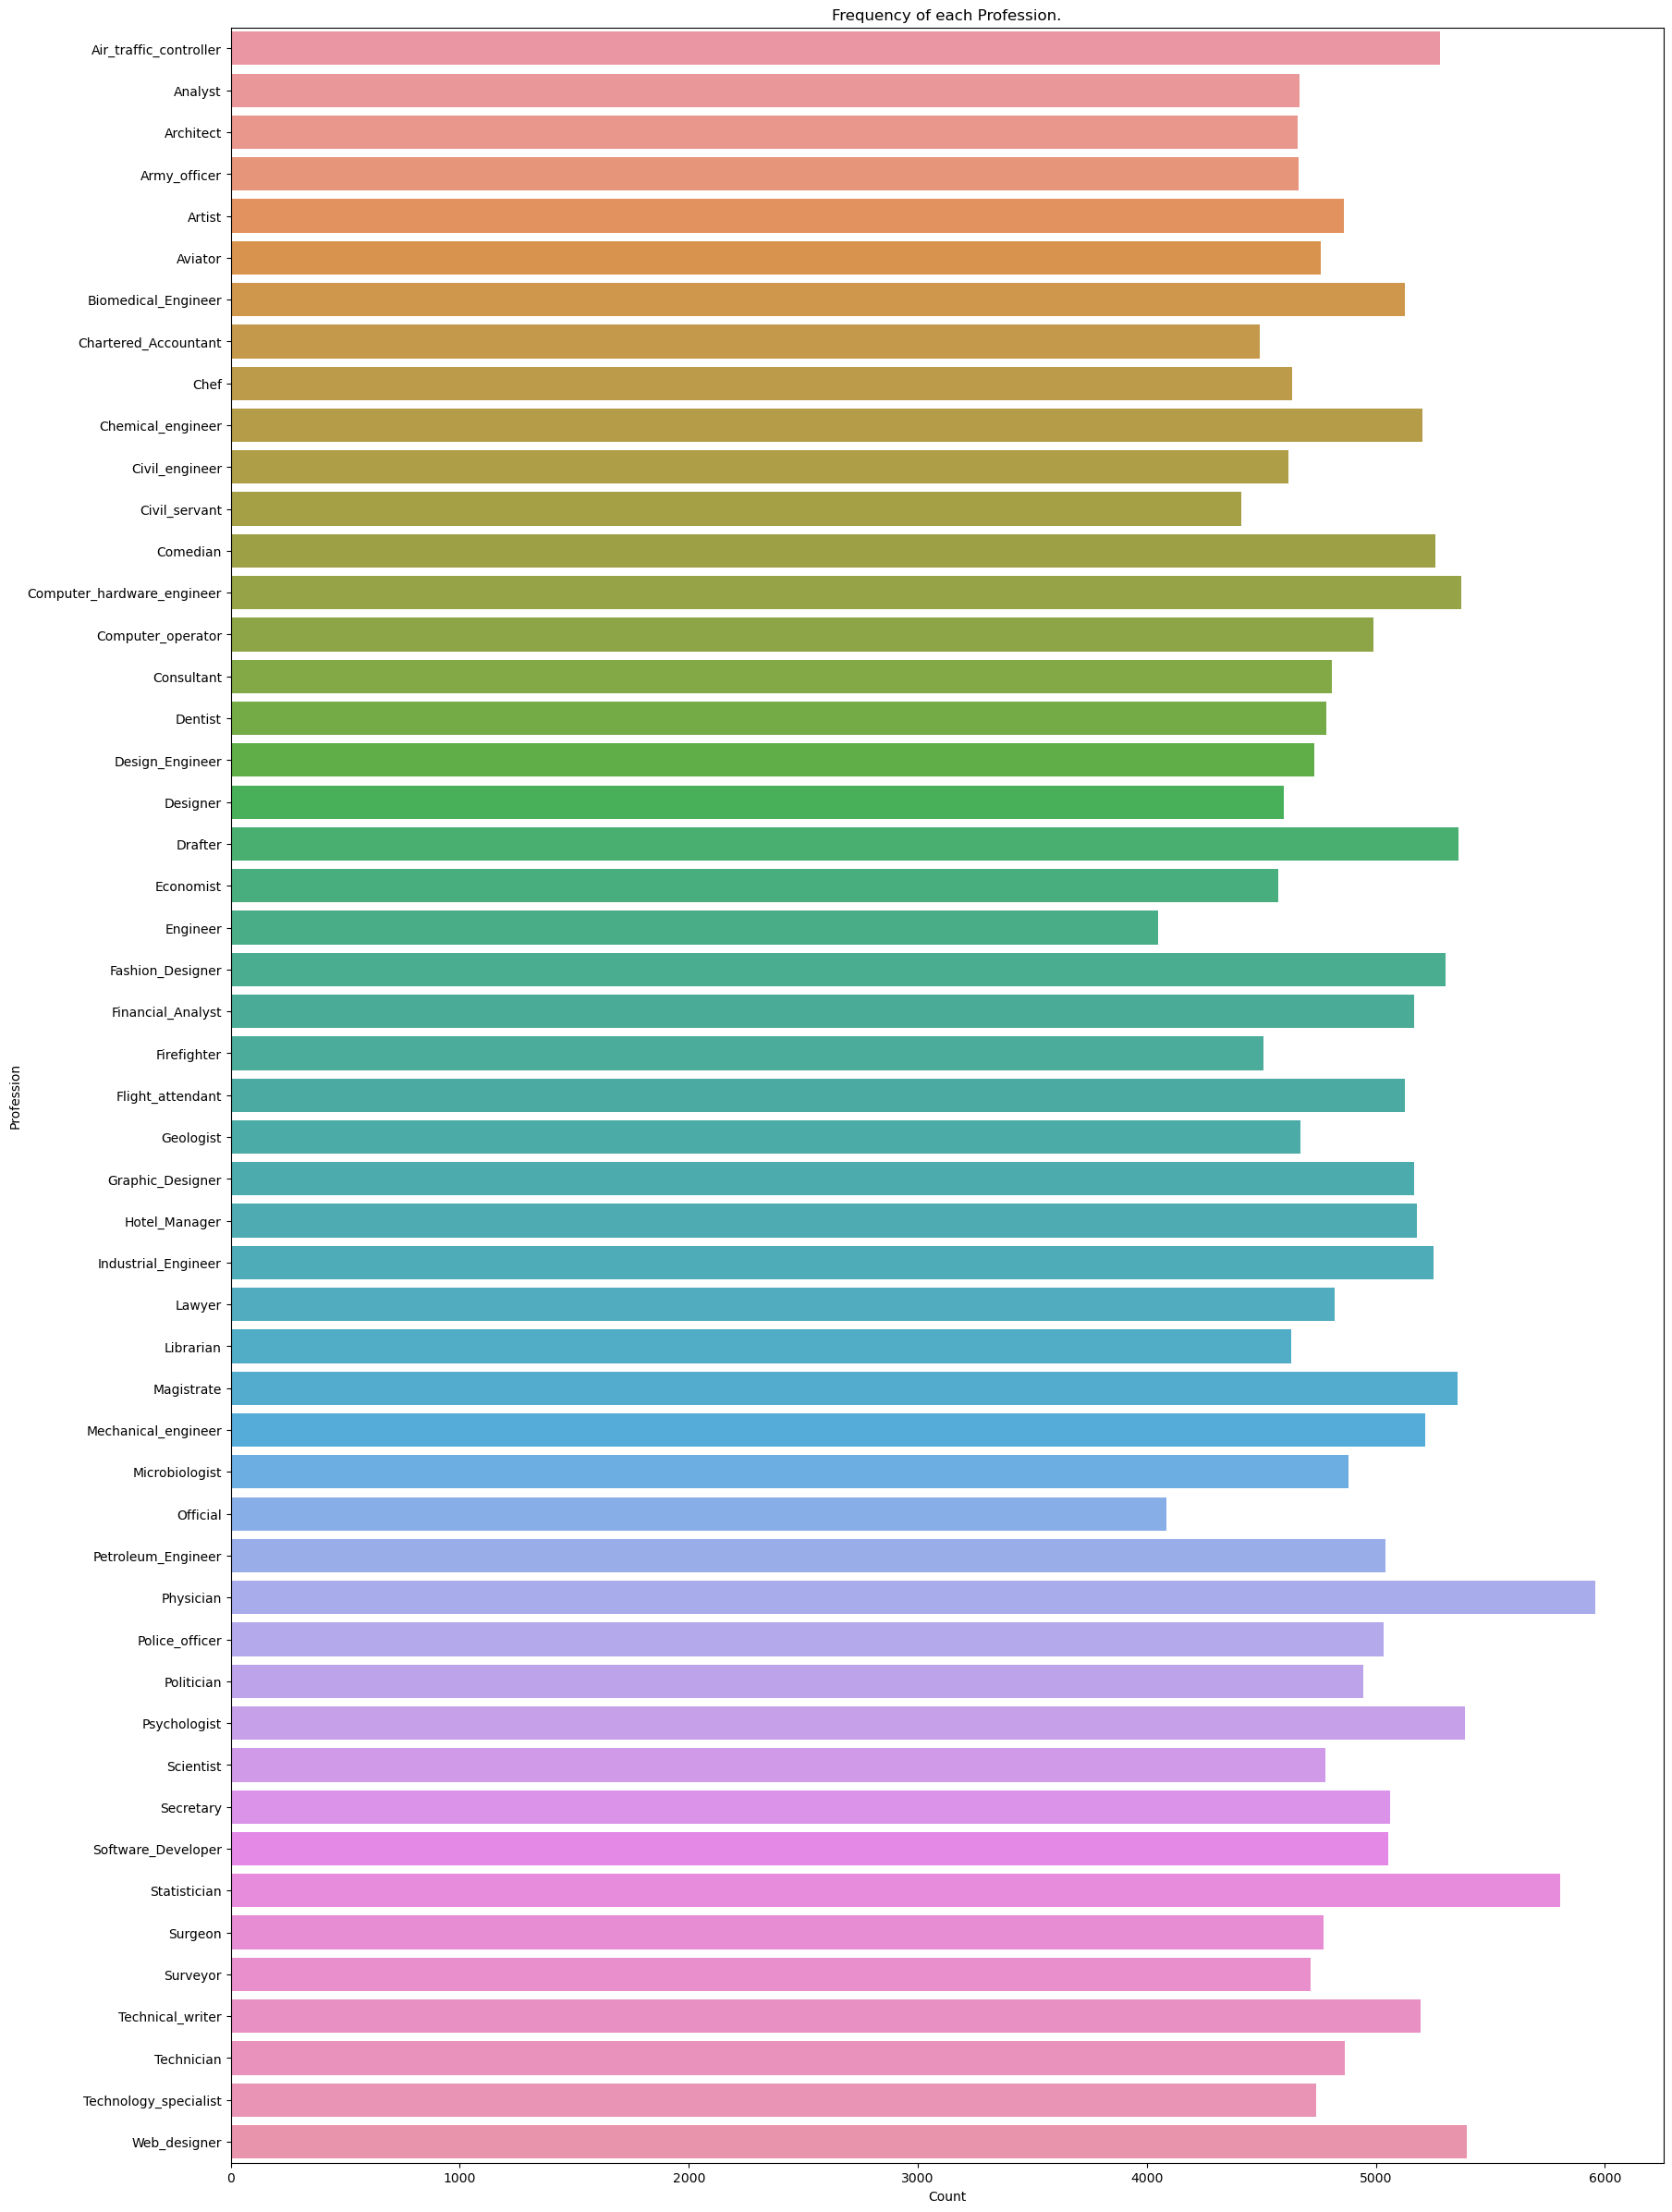

In [14]:
plt.figure(figsize=(20,30))
sns.countplot(y='Profession',data=df)
plt.title("Frequency of each Profession.")
plt.ylabel("Profession")
plt.xlabel("Count")
plt.show()

In [15]:
professions = df.groupby('Profession')
professions_list = df['Profession'].unique()
professions_list

['Mechanical_engineer', 'Software_Developer', 'Technical_writer', 'Civil_servant', 'Librarian', ..., 'Surgeon', 'Scientist', 'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist']
Length: 51
Categories (51, object): ['Air_traffic_controller', 'Analyst', 'Architect', 'Army_officer', ..., 'Technical_writer', 'Technician', 'Technology_specialist', 'Web_designer']

#### Average Income, Age and Experience of each profession

In [16]:
avg_incomes = []
avg_age = []
avg_exp = []

In [17]:
for profession in professions_list:
    p_age_mean = professions.get_group(profession)['Age'].mean()
    p_income_mean = professions.get_group(profession)['Income'].mean()
    p_exp_mean = professions.get_group(profession)['Experience'].mean()
    
    avg_incomes.append(p_income_mean)
    avg_age.append(p_age_mean)
    avg_exp.append(p_exp_mean)

In [18]:
pdf = pd.DataFrame({
    'Profession':professions_list,
    'Average Age':avg_age,
    'Average Income':avg_incomes,
    'Average Experience':avg_exp
})

pdf.head()

,Profession,Average Age,Average Income,Average Experience
0,Mechanical_engineer,49.368986,5.175032e+06,9.526548
1,Software_Developer,50.060558,4.891296e+06,10.074807
2,Technical_writer,50.406352,4.922266e+06,9.887777
3,Civil_servant,52.756175,4.947843e+06,9.993429
4,Librarian,47.707433,5.007590e+06,9.091184


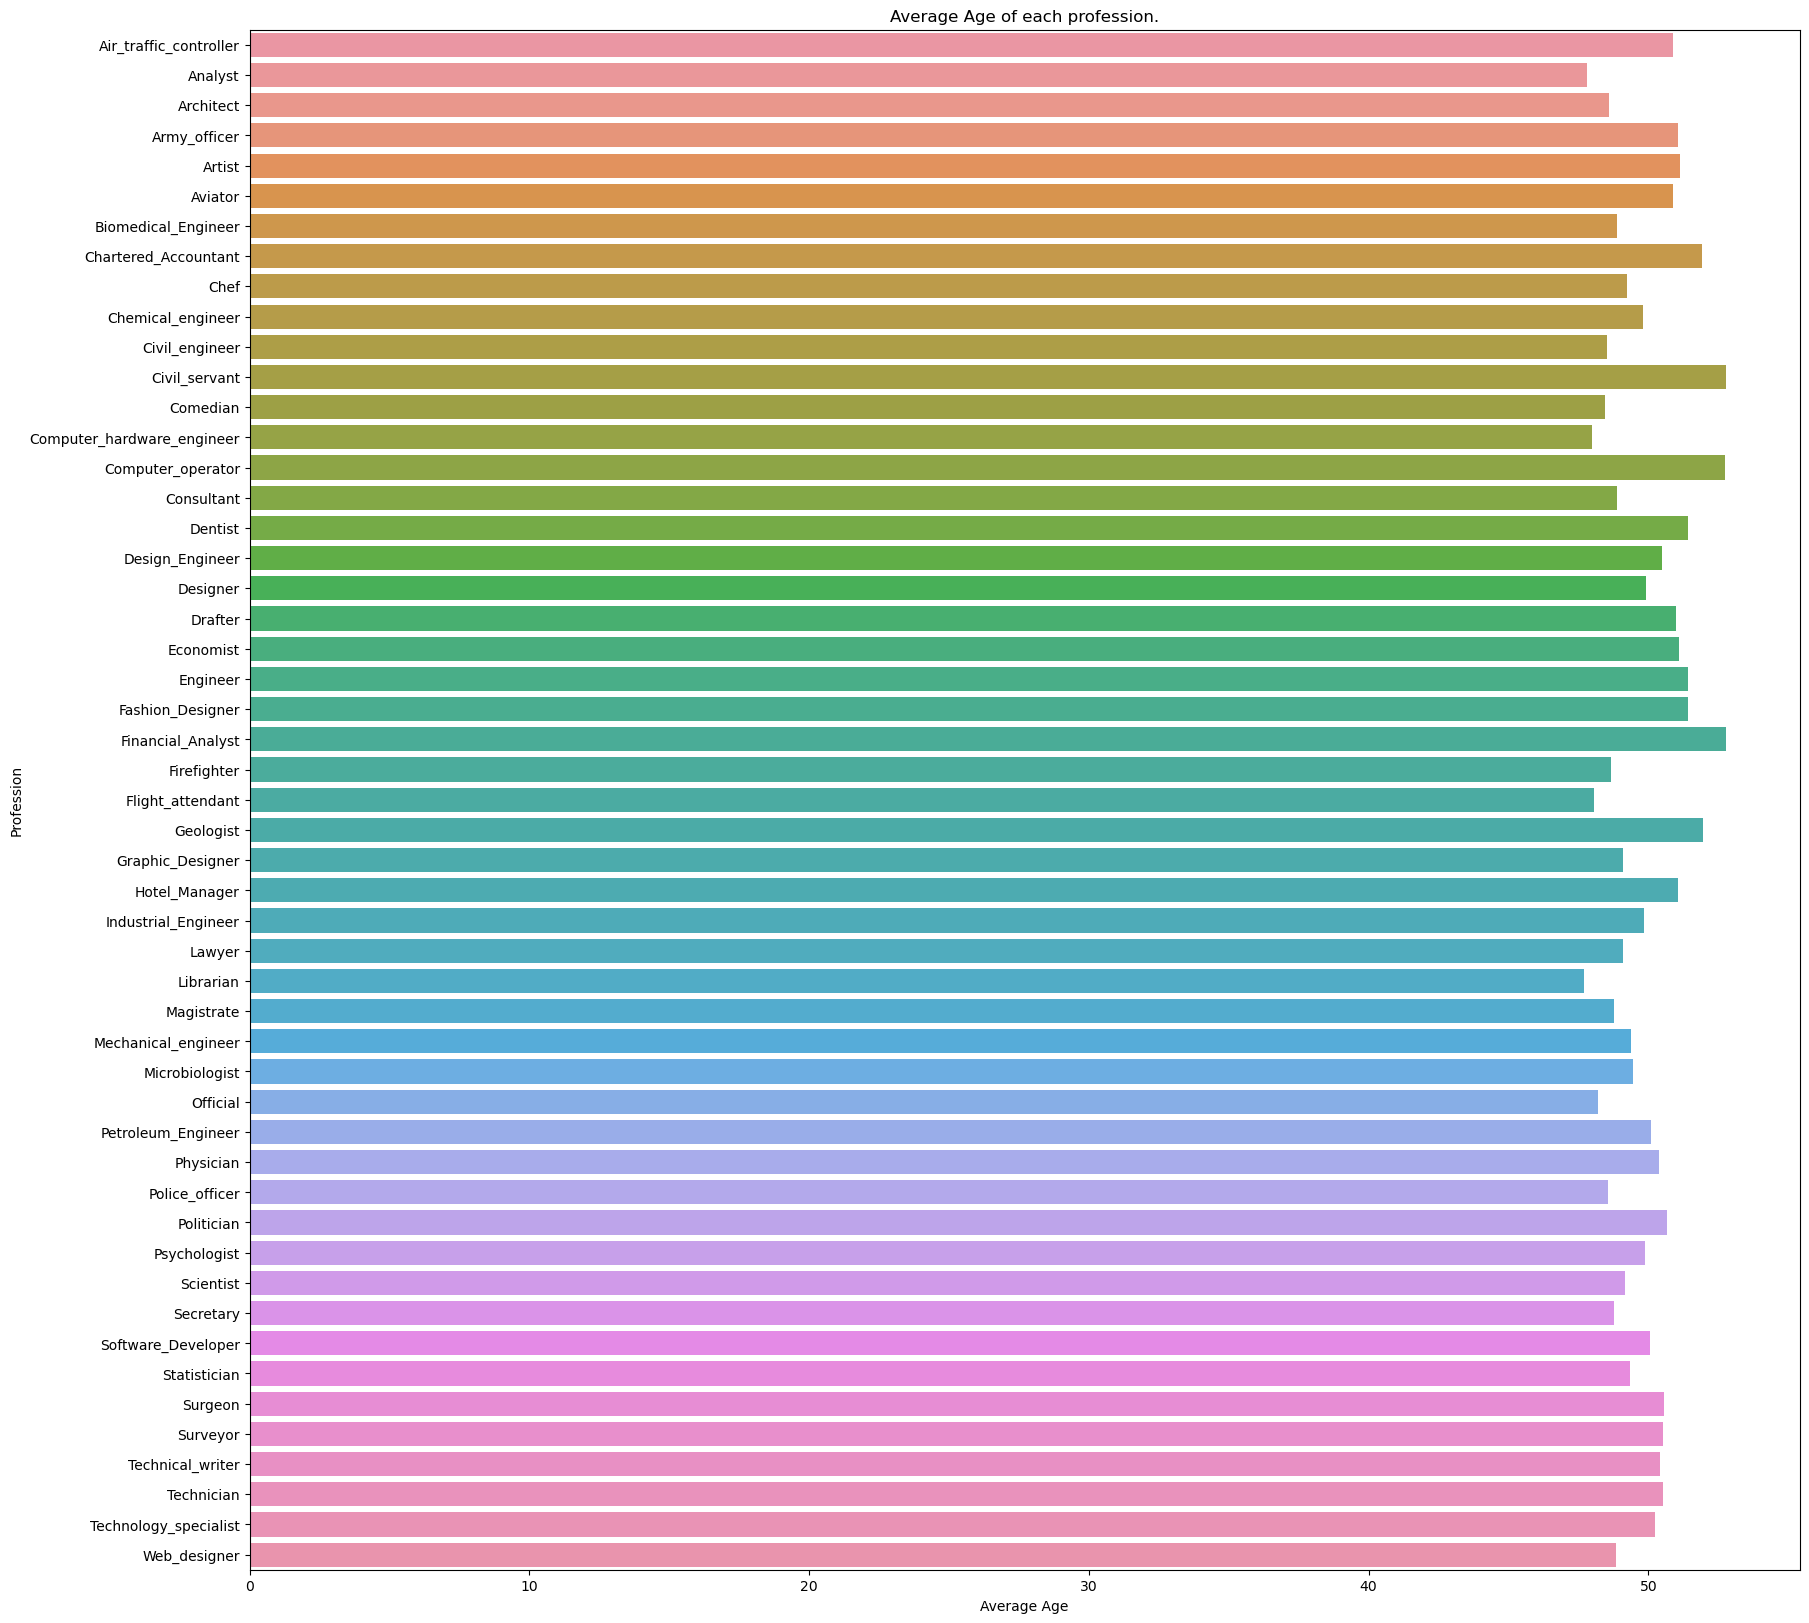

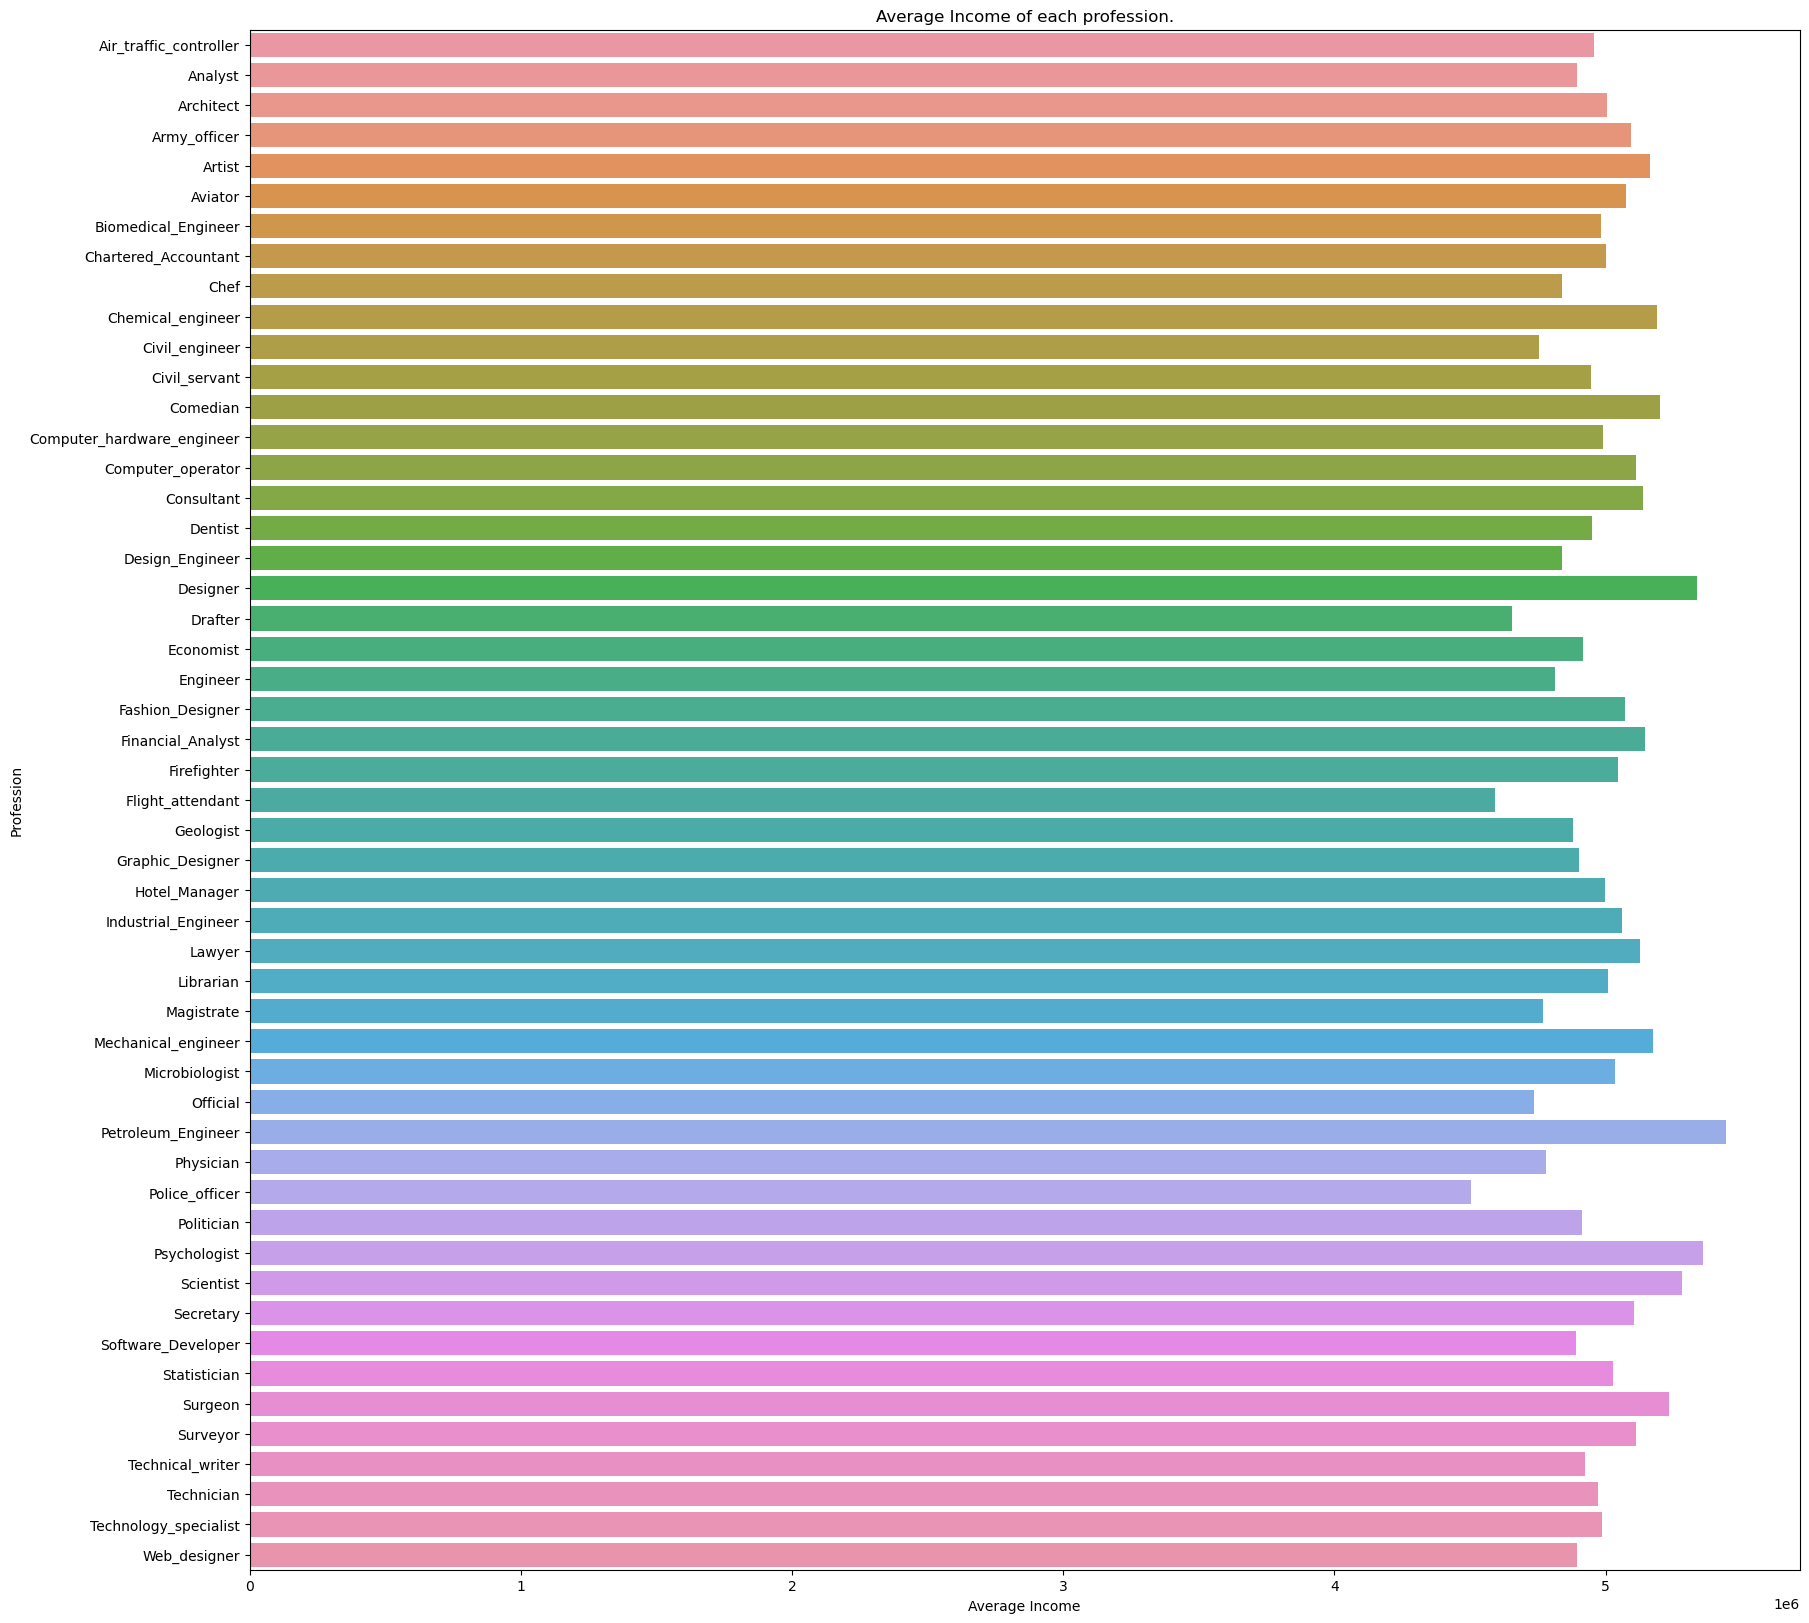

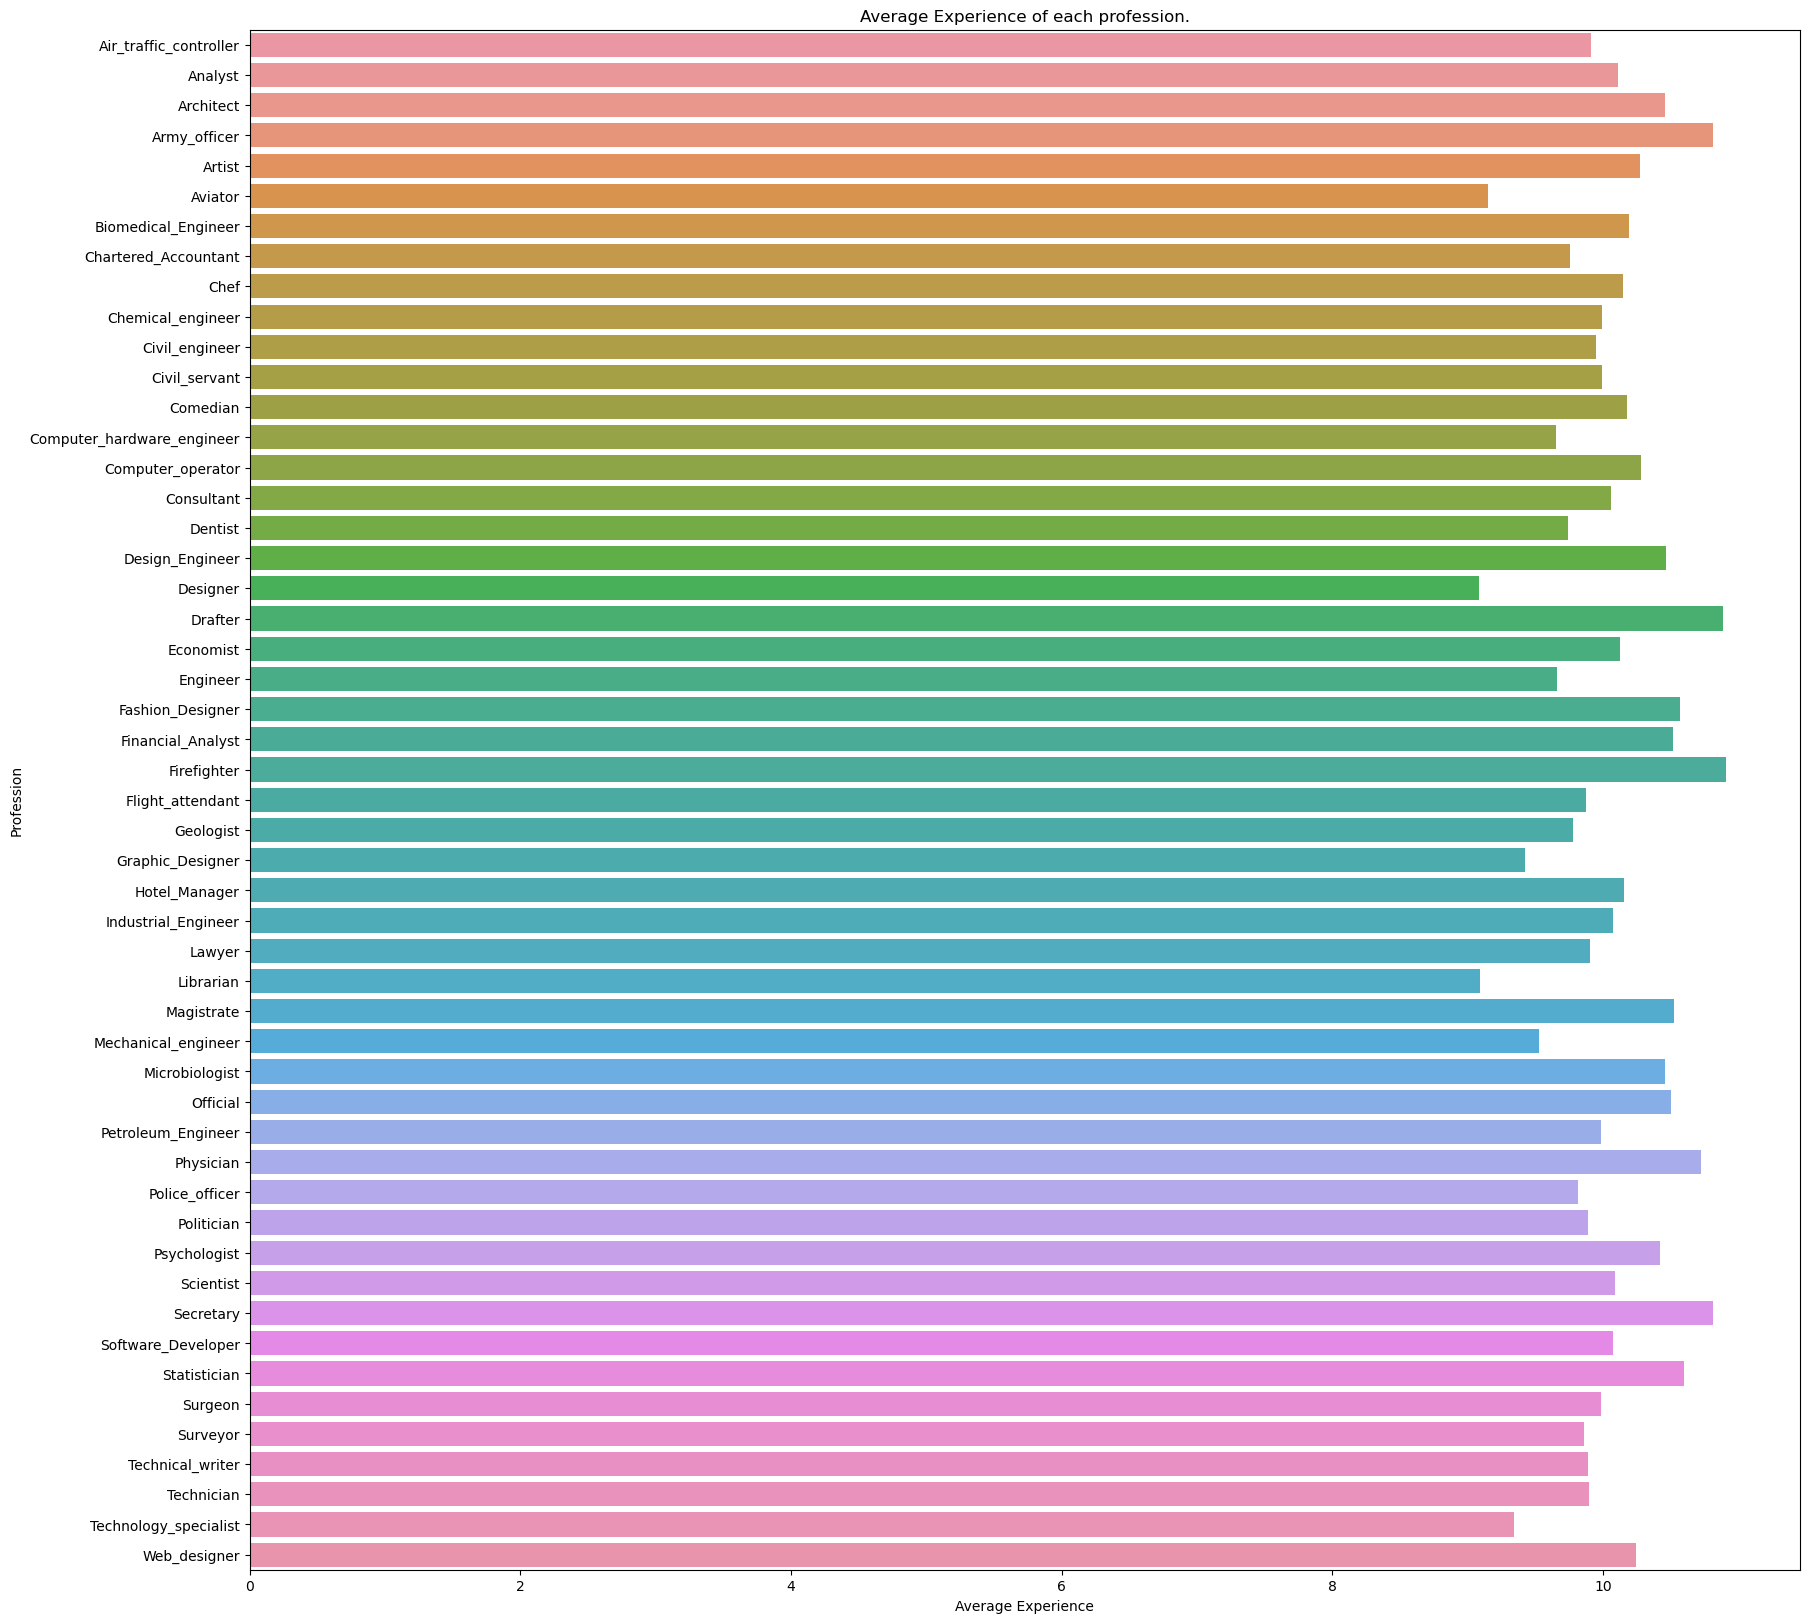

In [19]:
for col in pdf.columns[1:]:
    plt.figure(figsize=(20,20))
    sns.barplot(y=pdf['Profession'], x=pdf[col])
    plt.title(f"{col} of each profession.")
    plt.show()

In [20]:
df['CITY'].value_counts()

CITY
Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: count, Length: 317, dtype: int64

its look like there is some error in data and we fix this using data manupulation technique

In [21]:
# Fixing errors in the 'CITY' and 'STATE' columns by splitting the strings
df['CITY'] = df['CITY'].str.split('[').str[0]

In [22]:
df['STATE'] = df['STATE'].str.split('[').str[0]

In [23]:
df['CITY'].sample(15)

203068     Bongaigaon
132090         Ballia
62786        Srinagar
188060    Vasai-Virar
58562          Jorhat
136218           Orai
149450     Gandhidham
164611        Katihar
189394         Shimla
51426        Guwahati
36260     Thoothukudi
23630         Nellore
138202        Bhiwani
76942           Dehri
217827        Gangtok
Name: CITY, dtype: object

as we can see data is sorted

In [24]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


In [25]:
# Identifying numerical and categorical columns
numerical_col = df.select_dtypes(include=np.number).columns
categorical_col = df.select_dtypes(include = ['object','category']).columns

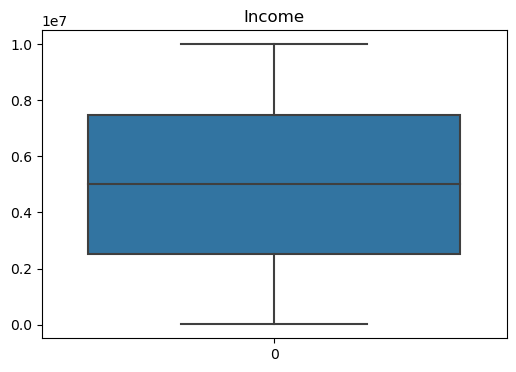

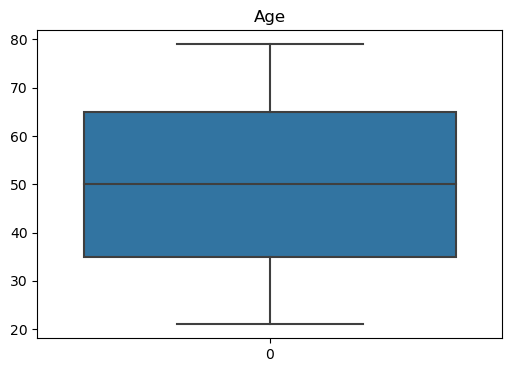

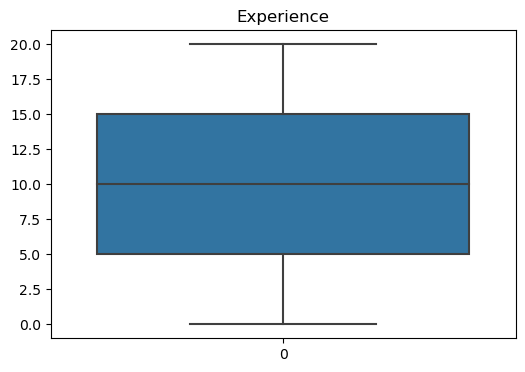

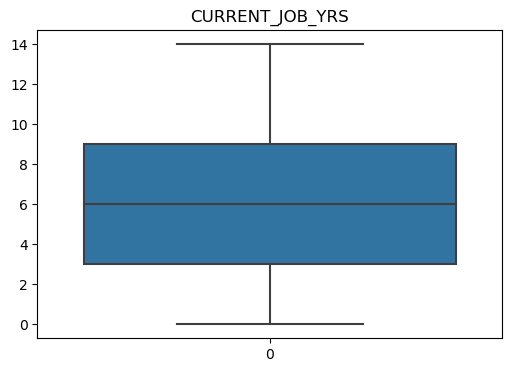

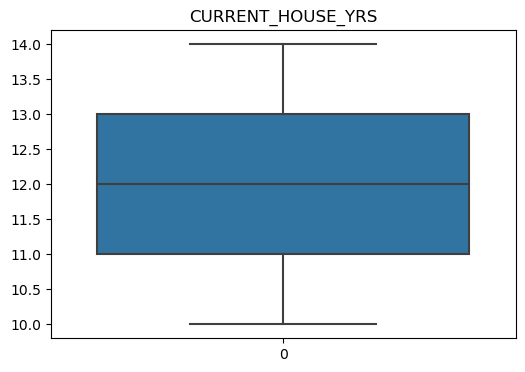

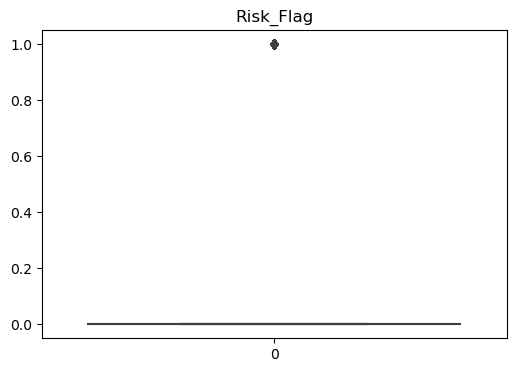

In [26]:
#checking the outliers in  numerical columns
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()
    

#### As We can see there is no outliers in the data hence we can move forward with our data

In [27]:
# for better machine learning algorithm we have encode the categorical col into numerical col
#there are 2 methods one hot encoding and via pandas library
df = pd.get_dummies(df,columns=['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE'],drop_first=True,dtype=int)

In [28]:
#checking the data
df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,...,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,3,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Now data is fully converted now our next step is to scale down the data not the whole data but few col like income and age our data should be linear or close to linear which make the calculation easy

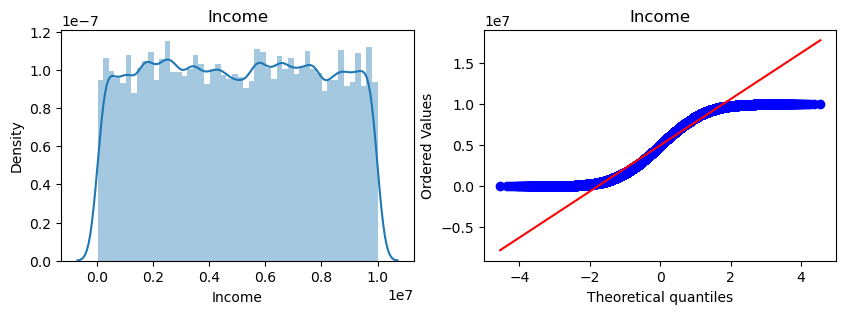

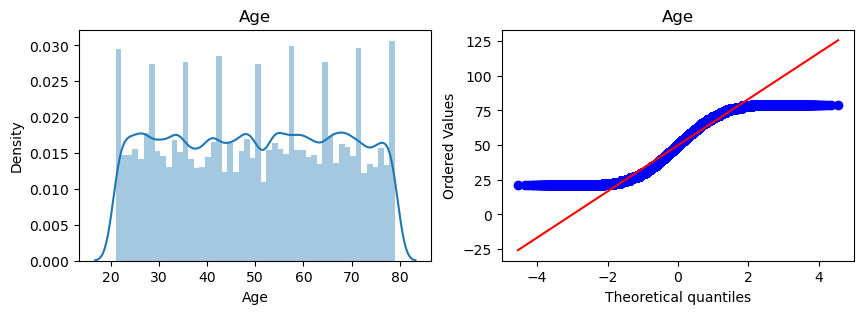

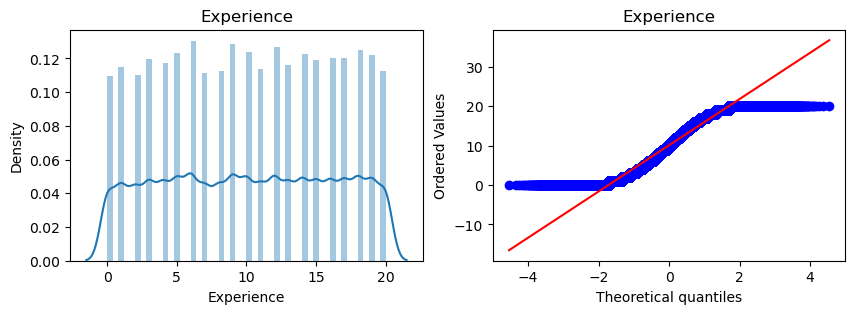

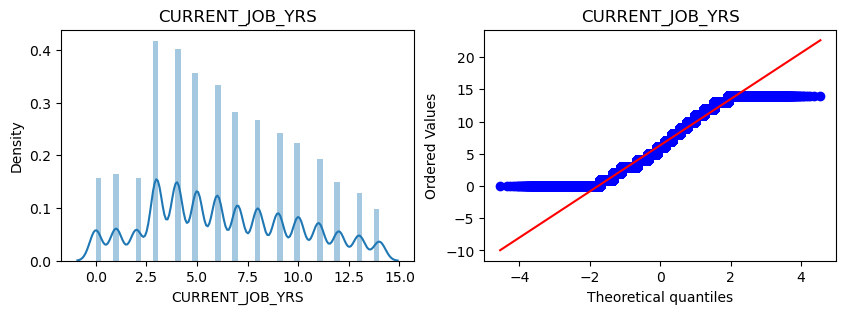

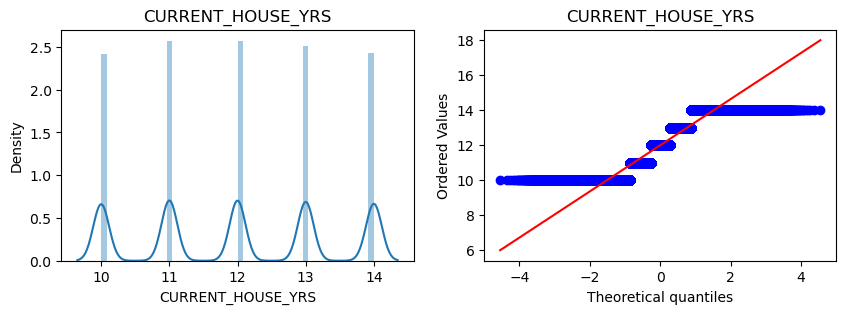

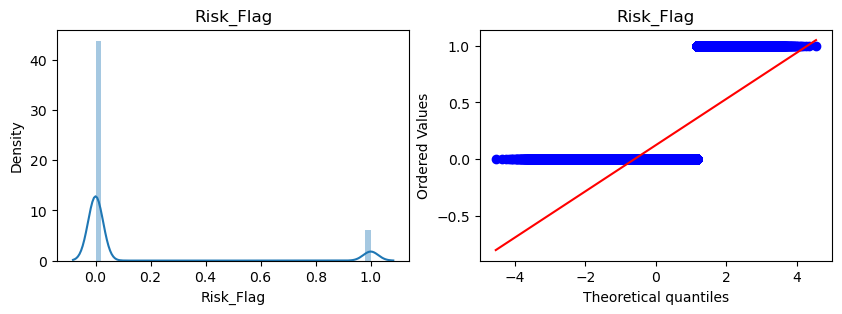

In [29]:
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
for col in numerical_col:
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

In [30]:
# train test split the data
X = df.drop(['Risk_Flag'],axis=1)
y = df['Risk_Flag']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
# Applying SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

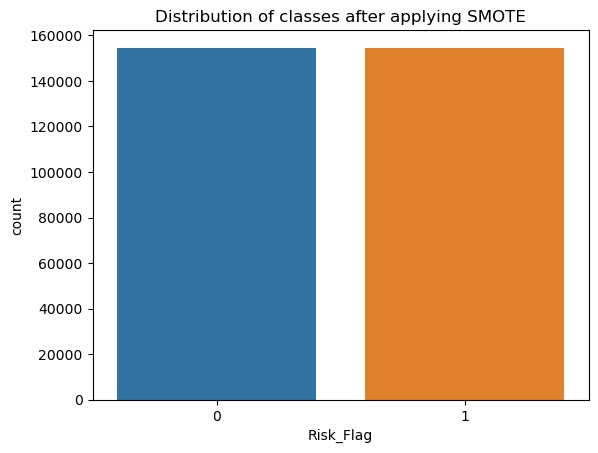

In [32]:
# Display the distribution of classes after applying SMOTE
sns.countplot(x=y_train_sm)
plt.title('Distribution of classes after applying SMOTE')
plt.show()

In [33]:
# Display the first few rows of the training set after SMOTE
X_train_sm.head()

# Display the shape of the testing set
X_test.shape

# Display the shape of the training set after SMOTE
X_train_sm.shape

(309350, 401)

In [34]:
X_train_sm.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,...,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,4151262,40,12,11,11,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3498172,72,1,1,11,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3902265,26,5,3,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6885928,79,15,13,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5600342,31,20,7,12,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
X_test.shape

(75600, 401)

In [36]:
X_train.shape

(176400, 401)

In [37]:
from sklearn.preprocessing import StandardScaler,FunctionTransformer

In [38]:
# Applying log transformation to skewed numerical columns
ft = FunctionTransformer(np.log1p)
X_train_ft = ft.fit_transform(X_train_sm[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])
X_test_ft = ft.transform(X_test[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])

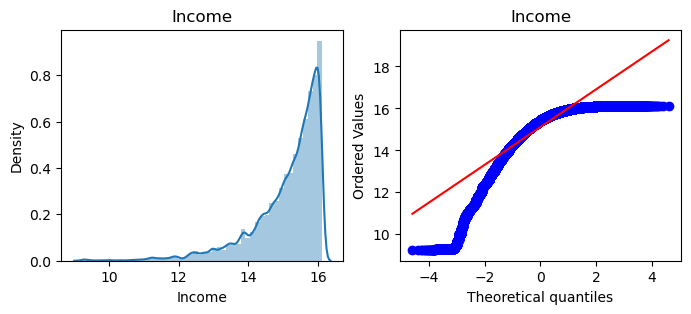

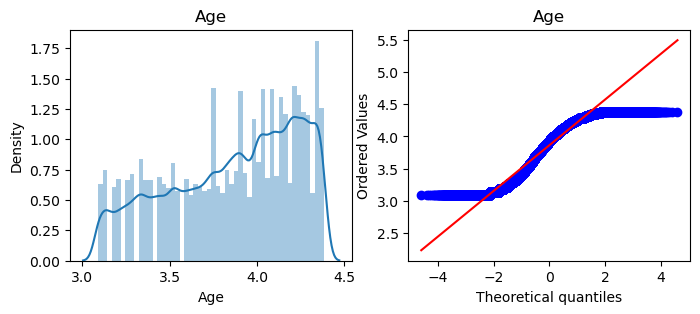

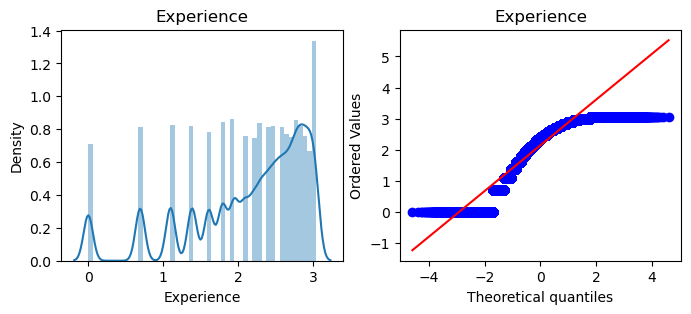

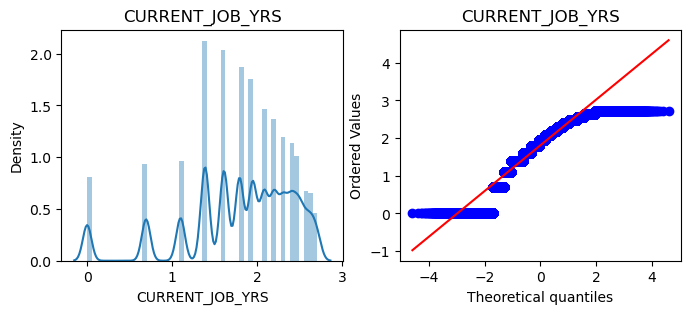

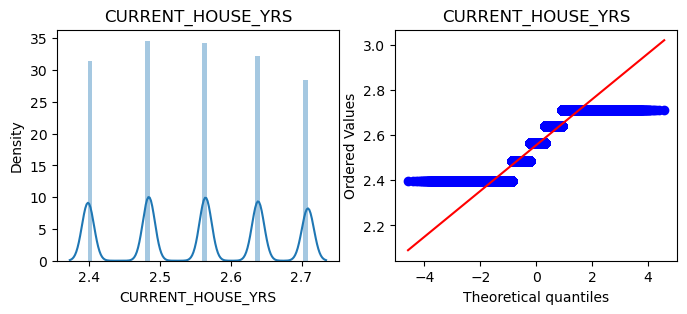

In [39]:
# Visualizing the distribution of transformed columns
for col in X_train_ft:
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    sns.distplot(X_train_ft[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train_ft[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

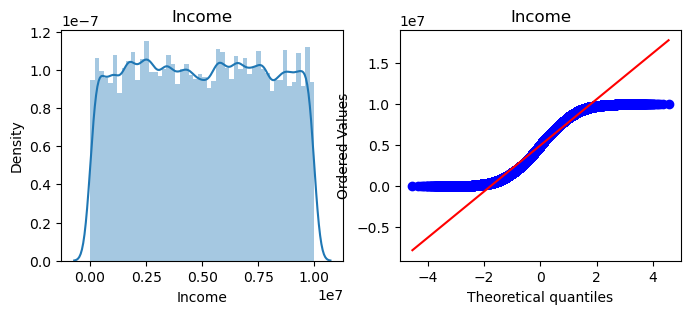

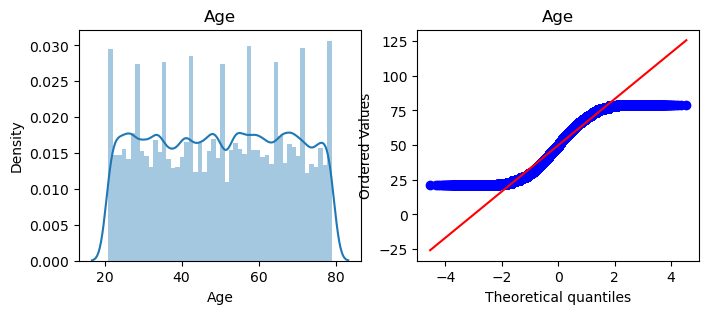

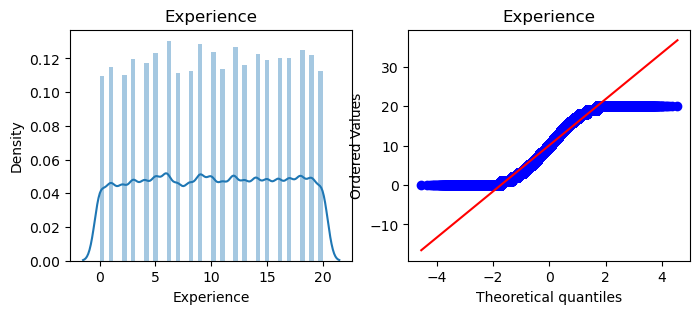

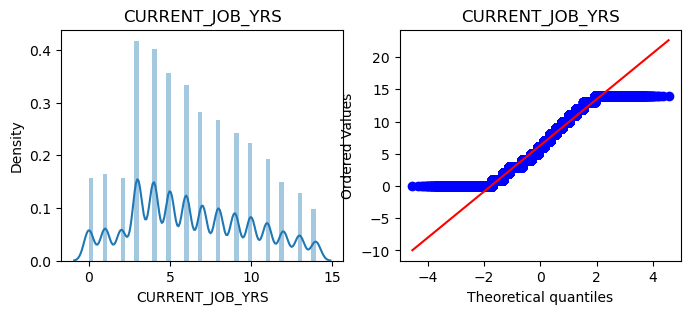

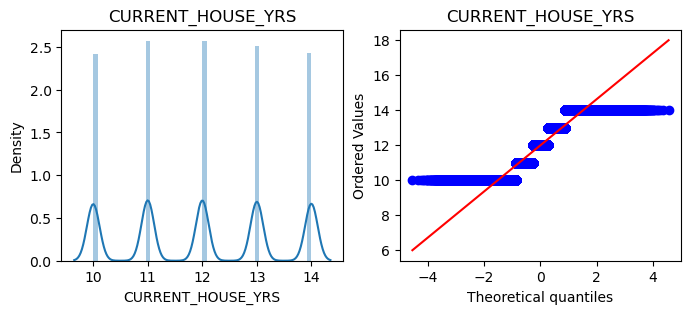

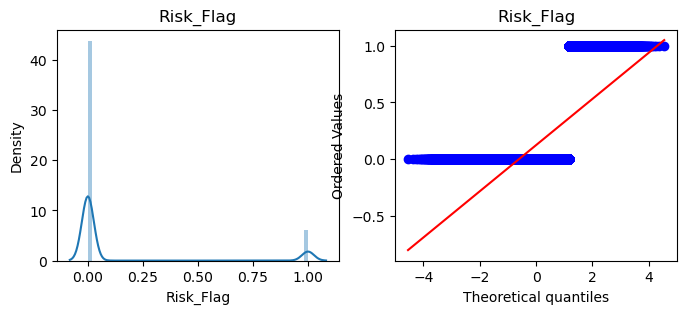

In [40]:
for col in numerical_col:
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

In [41]:
# Scaling numerical columns using StandardScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train_trf = scaler.fit_transform(X_train_sm[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])
X_test_trf = scaler.transform(X_test[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])

In [42]:
from scipy.sparse import csr_matrix
# Convert DataFrames to sparse matrices
X_train_sm_sparse = csr_matrix(X_train_sm.values)
X_test_sparse = csr_matrix(X_test.values)

In [43]:
# Getting the feature names after scaling
feature_names = scaler.get_feature_names_out(['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'])

In [44]:
# Converting the scaled arrays back to DataFrames
X_train_trf = pd.DataFrame(X_train_trf,columns=feature_names)

In [45]:
X_test_trf = pd.DataFrame(X_test_trf,columns=feature_names)

In [46]:
X_train_trf.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.414547,0.327586,0.60,0.785714,0.25
1,0.349167,0.879310,0.05,0.071429,0.25
2,0.389621,0.086207,0.25,0.214286,1.00
3,0.688313,1.000000,0.75,0.928571,0.75
4,0.559614,0.172414,1.00,0.500000,0.50


In [47]:
X_test_trf.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.425531,0.448276,0.90,0.500000,0.75
1,0.852834,0.396552,0.10,0.142857,0.00
2,0.784690,0.586207,0.45,0.642857,0.75
3,0.849044,0.689655,1.00,0.571429,0.25
4,0.152862,0.982759,0.65,0.642857,0.50


In [48]:
#dropping untransformed columns
X_train_new1 = X_train_sm.drop(['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'],axis=1)
X_test_new1 = X_test.drop(['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'],axis=1)

In [49]:
X_train_new1.shape

(309350, 396)

In [50]:
X_train_trf.shape

(309350, 5)

In [51]:
# Concatenating the scaled and remaining columns for the final training and testing sets
X_train_new2 = pd.concat((X_train_trf.reset_index(drop=True),X_train_new1.reset_index(drop=True)),axis=1)
X_test_new2 = pd.concat((X_test_trf.reset_index(drop=True),X_test_new1.reset_index(drop=True)),axis=1)

In [52]:
# Checking for null values in the final testing set
X_test_new2.isnull().sum()

Income                 0
Age                    0
Experience             0
CURRENT_JOB_YRS        0
CURRENT_HOUSE_YRS      0
                      ..
STATE_Telangana        0
STATE_Tripura          0
STATE_Uttar_Pradesh    0
STATE_Uttarakhand      0
STATE_West_Bengal      0
Length: 401, dtype: int64

In [53]:
# Convert final training and testing sets to sparse matrices
X_train_new2_sparse = csr_matrix(X_train_new2.values)
X_test_new2_sparse = csr_matrix(X_test_new2.values)


In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_new2_sparse, y_train_sm)

y_pred2 = dt.predict(X_test_new2_sparse)

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', max_iter=1000)
lr.fit(X_train_new2_sparse, y_train_sm)

y_pred = lr.predict(X_test_new2_sparse)

In [59]:
from sklearn.metrics import accuracy_score
print(f'Logistic Regression accuracy score: {accuracy_score(y_test,y_pred)}')
print(f'DT accuracy score: {accuracy_score(y_test,y_pred2)}')

Logistic Regression accuracy score: 0.685515873015873
DT accuracy score: 0.869973544973545


### As we can see our Decision tree model is working well with this algorithm